(426, 640, 3)


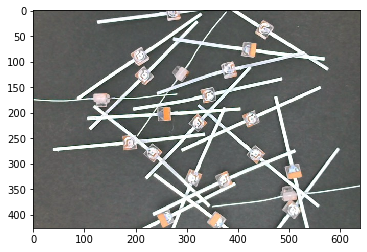

0 0


ValueError: X has 1 features per sample; expecting 3072

In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import cv2
cut_size = 50
im_rows = 32
im_cols = 32
im_color = 3
in_shape = (im_rows,im_cols,im_color)
nb_classes = 6
out_dump = 'led.pkl'

def svm_training(path='./led.npz'):
    photos = np.load(path)
    x = photos['x']
    y = photos['y']
    #print(y)
    #print(x)
    #x = x.reshape(-1, im_rows, im_cols, im_color)
    #x = x.astype('float32') / 255
    #y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

    clf = svm.LinearSVC()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

    joblib.dump(clf, out_dump)
    
def svm_test(path='pic1.jpg'):
    cfl = joblib.load(out_dump)
    img = cv2.imread(path)
    print(img.shape)
    plt.imshow(img)
    plt.show()
    x = 0
    y = 0
    w = cut_size * 2
    h = cut_size * 2
    for i in range(int(img.shape[0] / (cut_size * 2))):
        y = h * i
        x = 0
        for j in range(int(img.shape[1] / (cut_size * 2))):
            x = w * j
            print(x,y)
            new_img = img[y:y+h,x:x+w]
            new_img = cv2.resize(new_img,(im_rows,im_cols))
            new_img = new_img.reshape((-1,1,))
            res = clf.predict(new_img)
            plt.imshow(new_img)
            plt.title(res)
            plt.show()
            
svm_test()